In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
df=pd.read_csv('weather.csv')

**DATA OVERVIEW AND CLEANING**
After importing the dataset,we can analyse the various characteristics of the dataset such as the number of records,the content in each of the columns,the type of data types used and the general characteristics of the dataset itself.One can also find the null values of the dataset.I also checked for existence of duplicates in my records.I carried out this as follows

In [7]:
df.shape

(8784, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [10]:
df.head()


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [11]:
df.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [12]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.duplicated().sum()

0

There were no null values or duplicated records in the weather dataset.I used the duplicated().sum() method to check for duplicated records.I used isnull().sum() method to check for null records.Since there were no null records there was no need for dropping them or adding new data onto my dataset

**STATISTICAL SUMMARY**
The following is how i used the describe method to get the statistical summary of my data set.I used the describe(include='all')method to get further statistical information.I further computed the measures of central tendencies of the dataset ie(mean,mode,median) and a correlation matrix.

In [20]:
df.describe(include='all')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
unique,8784,NaN,NaN,NaN,NaN,NaN,NaN,50
top,1/1/2012 0:00,NaN,NaN,NaN,NaN,NaN,NaN,Mainly Clear
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2106
mean,NaN,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,NaN
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,NaN
min,NaN,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,NaN
25%,NaN,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,NaN
50%,NaN,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,NaN
75%,NaN,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,NaN


In [23]:
df.mean(numeric_only=True)


Temp_C                8.798144
Dew Point Temp_C      2.555294
Rel Hum_%            67.431694
Wind Speed_km/h      14.945469
Visibility_km        27.664447
Press_kPa           101.051623
dtype: float64

In [25]:
df.median(numeric_only=True)

Temp_C                9.30
Dew Point Temp_C      3.30
Rel Hum_%            68.00
Wind Speed_km/h      13.00
Visibility_km        25.00
Press_kPa           101.07
dtype: float64

In [24]:
df.mode()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,16.6,-0.9,68.0,9.0,25.0,101.13,Mainly Clear
1,1/1/2012 10:00,NaN,12.9,NaN,NaN,NaN,NaN,NaN
2,1/1/2012 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/2012 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/1/2012 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
8779,9/9/2012 5:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8780,9/9/2012 6:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8781,9/9/2012 7:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8782,9/9/2012 8:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.corr()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


D:\Users\HP AMD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp_C'>

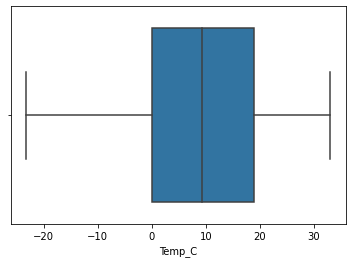

In [30]:
sns.boxplot(df['Temp_C'])

**DATA VISUALIZATION**
Visualization of data provides an easier way of analyzing our data.This is carried out through various techniques as follows:-Use of histograms
        -Use of line graphs
        -Use of scatter plots
        -Use of heatmaps


In [35]:
df['Temp_C'].hist

<bound method hist_series of 0      -1.8
1      -1.8
2      -1.8
3      -1.5
4      -1.5
       ... 
8779    0.1
8780    0.2
8781   -0.5
8782   -0.2
8783    0.0
Name: Temp_C, Length: 8784, dtype: float64>

In [37]:
df['Wind Speed_km/h'].hist

<bound method hist_series of 0        4
1        4
2        7
3        6
4        7
        ..
8779    30
8780    24
8781    28
8782    28
8783    30
Name: Wind Speed_km/h, Length: 8784, dtype: int64>

D:\Users\HP AMD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp_C'>

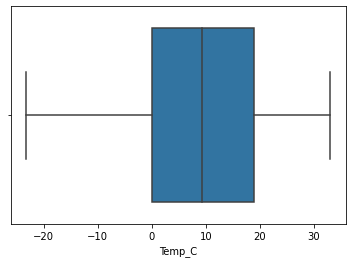

In [39]:
sns.boxplot(df['Temp_C'])

Text(0, 0.5, 'Temperature (°C)')

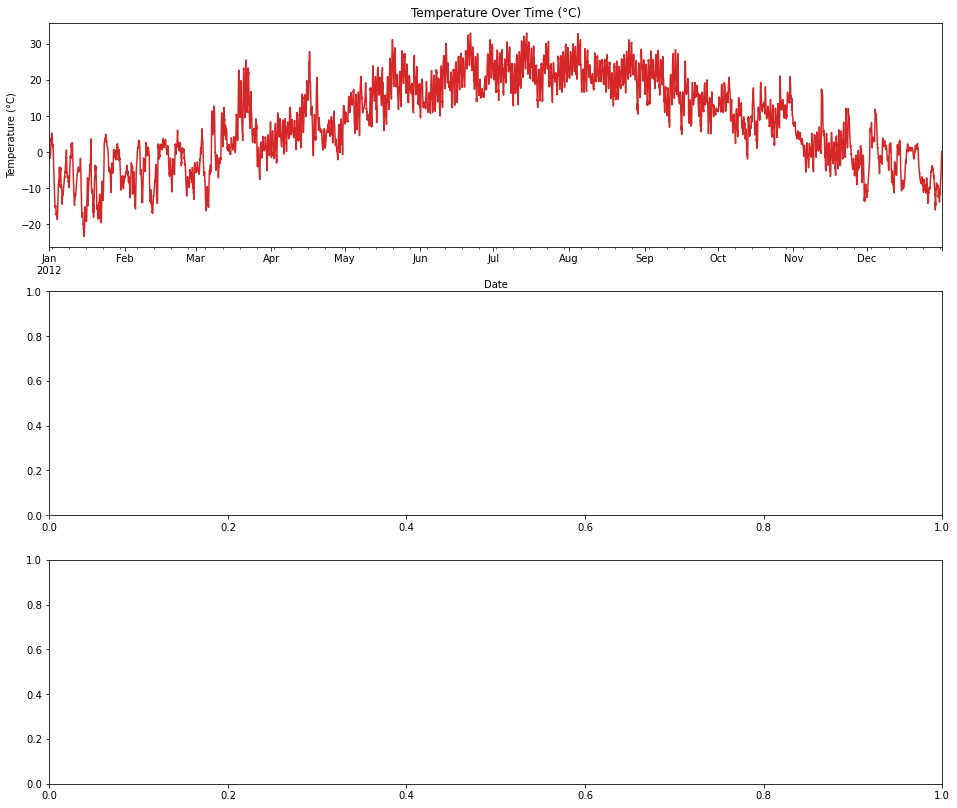

In [52]:

#time series graphs that visualise trends over time
fig,axes=plt.subplots(3,1,figsize=(16,14))
df['Temp_C'].plot(ax=axes[0], color='tab:red', title='Temperature Over Time (°C)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Temperature (°C)')


<AxesSubplot:>

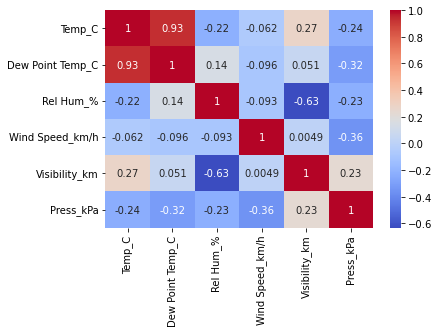

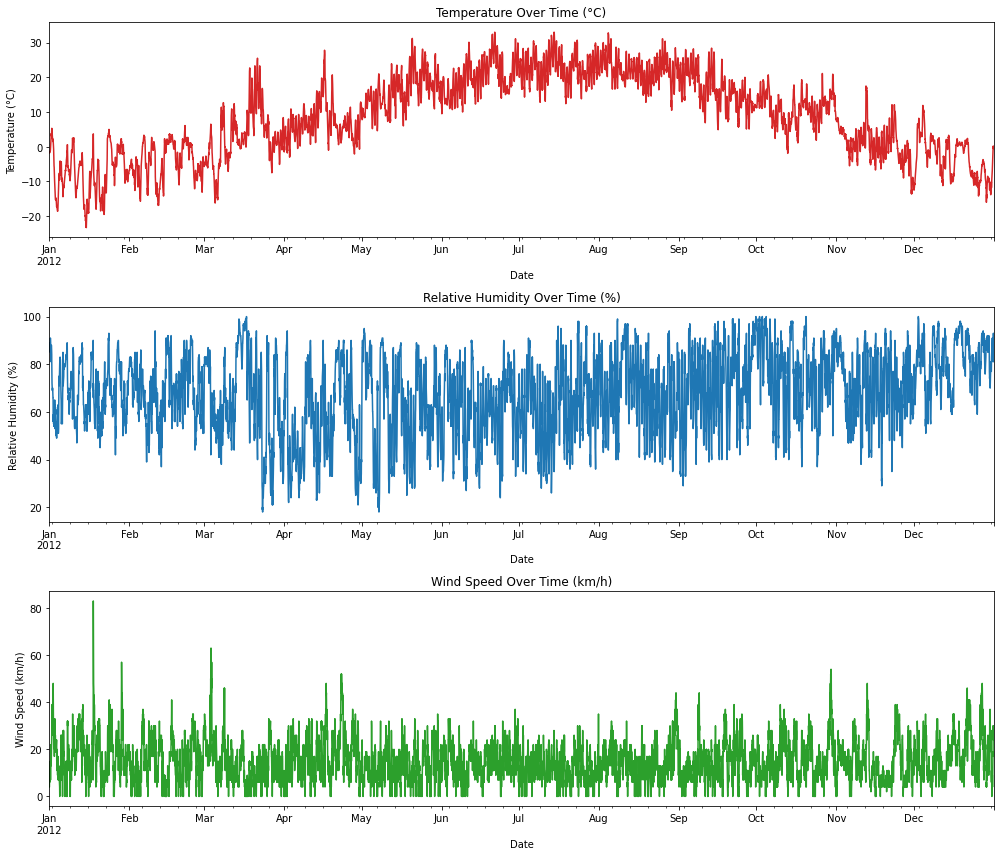

In [56]:



# Plotting Time Series for Temperature, Humidity, and Wind Speed
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Temperature over time
df['Temp_C'].plot(ax=axes[0], color='tab:red', title='Temperature Over Time (°C)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Temperature (°C)')

# Relative Humidity over time
df['Rel Hum_%'].plot(ax=axes[1], color='tab:blue', title='Relative Humidity Over Time (%)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Relative Humidity (%)')

# Wind Speed over time
df['Wind Speed_km/h'].plot(ax=axes[2], color='tab:green', title='Wind Speed Over Time (km/h)')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Wind Speed (km/h)')

plt.tight_layout()
plt.show()

**Weather Patterns and Trends**

The following are some of the weather trends that can be observed from the visualized data:

-There is higher temperature in the following months ie Jun,July and August.These are the summer months.

-Humidity level is higher in the summer months.

-Visibility decreases during the winter months.

-Fog weather condition  has very low visibility.

-Clear weather condition has very high visibility.

-Lower wind speeds are more common than very high windspeeds ie high windspeeds of upto 83km/hr are rare.




**Anomalies**

-There are days where the windspeed is 0km/hr.

-There was a pressure anomalie where the atmospheric pressure was very far from the average pressure records.
The anomalies could be associated with extreme weather events.



**INSIGHTS AND CONCLUSION**
-The dataset shows that there exists seasonal trends that is due to change in temperature records at specific times.

-There were anomalies in windspeed and pressure.This shows occurence of extreme weather events that might have occured in particular days.

-There were no temperature anomalies detected.



**Practical Applications from Insights made**
-Anomalies that were in relation to windspeed can be used in preparation for occurences of extreme weather conditions such as storms.This helps meteorologists in making predictions.
-Stable temperature patterns can be used in planning in areas such as agricultural sector and other temperature related activities such as sports events.




**Recommendations for further analysis**

-One can compare the dataset above to previous datasets that may help in understanding more about the dataset.

-Explore the actual causes of the anomalies in the dataset.

-Analyze the impact of weather changes on the socio-economic sectors such as the agricultural and tourism sector.

-Explore the impact of various weather conditions in the health sector.